# 5. Loading  Files with all Abstracts as Text for both Tetracted and Non-retracted Papers 

In [16]:
# Import required libraries

import pandas as pd
import numpy as np

import requests
import csv
import os
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# Non retracted papers

Reading the csv file with the text of non-retracted papers into a dataframe:

In [17]:

# Path to the CSV file for non-retracted papers

file_path = '../data/abstracts/cell_biology/non_retracted/non_retracted_cell_biology_abstracts.csv'

# Load the CSV file into a DataFrame, specifying the pipe '|' as the delimiter

abstract_nonretracted_df = pd.read_csv(file_path, delimiter='|')

# Display information about the DataFrame to understand its structure
abstract_nonretracted_df.info()
abstract_nonretracted_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6779 entries, 0 to 6778
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  6779 non-null   object
 1   target         6779 non-null   int64 
 2   doi            6779 non-null   object
 3   country        6721 non-null   object
 4   year           6779 non-null   int64 
 5   ret_flag       6779 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 271.6+ KB


,abstract_text,target,doi,country,year,ret_flag
0,"""Src kinase mediates growth factor signaling a...",1,10.1073_pnas.0701077104,US,2007,False
1,"""Histidine-rich calcium binding protein (HRC) ...",1,10.7150_ijms.60610,CN,2021,False
2,"""Significance Animal cells undergo a remarkabl...",1,10.1073_pnas.1420585112,GB,2015,False
3,"""Inositol-requiring enzyme 1 (IRE1) is the mos...",1,10.1074_jbc.m110.199737,US,2011,False
4,"""Abstract Hepatocellular carcinoma (HCC) is th...",1,10.1038_s41388-020-01417-6,CN,2020,False


Removing all rows where "retract" or "withdraw" appear in the abstract text:

In [18]:

# Filter the DataFrame to only include rows where 'ret_flag' is True

ret_flag_nonretracted_df = abstract_nonretracted_df[abstract_nonretracted_df['ret_flag'] == True]

# Info on the filtered DataFrame

ret_flag_nonretracted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 67 to 6435
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  32 non-null     object
 1   target         32 non-null     int64 
 2   doi            32 non-null     object
 3   country        32 non-null     object
 4   year           32 non-null     int64 
 5   ret_flag       32 non-null     bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 1.5+ KB


In [19]:

# Drop rows where 'ret_flag' is True directly from the main DataFrame

cleaned_nonretracted_df = abstract_nonretracted_df[abstract_nonretracted_df['ret_flag'] != True]

# Display the cleaned DataFrame to verify the rows are dropped

cleaned_nonretracted_df.info()
cleaned_nonretracted_df

<class 'pandas.core.frame.DataFrame'>
Index: 6747 entries, 0 to 6778
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  6747 non-null   object
 1   target         6747 non-null   int64 
 2   doi            6747 non-null   object
 3   country        6689 non-null   object
 4   year           6747 non-null   int64 
 5   ret_flag       6747 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 322.9+ KB


,abstract_text,target,doi,country,year,ret_flag
0,"""Src kinase mediates growth factor signaling a...",1,10.1073_pnas.0701077104,US,2007,False
1,"""Histidine-rich calcium binding protein (HRC) ...",1,10.7150_ijms.60610,CN,2021,False
2,"""Significance Animal cells undergo a remarkabl...",1,10.1073_pnas.1420585112,GB,2015,False
3,"""Inositol-requiring enzyme 1 (IRE1) is the mos...",1,10.1074_jbc.m110.199737,US,2011,False
4,"""Abstract Hepatocellular carcinoma (HCC) is th...",1,10.1038_s41388-020-01417-6,CN,2020,False
...,...,...,...,...,...,...
6774,"""Plum (""",1,10.1094_pdis-12-21-2672-pdn,CN,2022,False
6775,"""Species of Gnomoniaceae are commonly associat...",1,10.3897_mycokeys.69.54012,CN,2020,False
6776,"""Abstract The glucoseregulated endoplasmic ret...",1,10.1002_jcp.28727,CN,2019,False
6777,"""Noncanonical Wnt signaling by WNT5a has oncog...",1,10.1158_0008-5472.can-22-3003,US,2023,False


# Retracted papers

Reading the csv file with the text of retracted papaers into a dataframe:

In [25]:

# Relative path to the CSV file

file_path = '../data/abstracts/cell_biology/retracted/retracted_cell_biology_abstracts.csv'

# Load the CSV file into a DataFrame, specifying the pipe '|' as the delimiter

abstract_retracted_df = pd.read_csv(file_path, delimiter='|')

# Display information about the DataFrame to understand its structure
abstract_retracted_df.info()
abstract_retracted_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  7001 non-null   object
 1   target         7001 non-null   int64 
 2   doi            7001 non-null   object
 3   country        6984 non-null   object
 4   year           7001 non-null   int64 
 5   ret_flag       7001 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 280.4+ KB


,abstract_text,target,doi,country,year,ret_flag
0,"""Vascular endothelial growth factor receptor-1...",1,10.1371_journal.pone.0065217,CN,2013,False
1,"""Type 1 diabetes mellitus (T1DM) is a systemic...",1,10.1002_ptr.6533,CN,2019,False
2,"""The study was designed to elucidate the regul...",1,10.1002_jcb.29429,CN,2019,False
3,"""Hepatocellular carcinoma (HCC) is the third l...",1,10.1155_2014_486407,TW,2014,False
4,"""BACKGROUND Retinoblastoma is a rare malignanc...",1,10.12659_MSM.914242,CN,2019,False



Removing all rows where "retract" or "withdraw" appear in the abstract text:

In [21]:

# Filter the DataFrame to only include rows where 'ret_flag' is True

ret_flag_retracted_df = abstract_retracted_df[abstract_retracted_df['ret_flag'] == True]

# Display the filtered DataFrame

ret_flag_retracted_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 67 to 6435
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  32 non-null     object
 1   target         32 non-null     int64 
 2   doi            32 non-null     object
 3   country        32 non-null     object
 4   year           32 non-null     int64 
 5   ret_flag       32 non-null     bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 1.5+ KB


In [22]:

# Drop rows where 'ret_flag' is True directly from the main DataFrame

cleaned_retracted_df = abstract_retracted_df[abstract_retracted_df['ret_flag'] != True]

# Display the cleaned DataFrame to verify the rows are dropped

cleaned_retracted_df.info()
cleaned_retracted_df

<class 'pandas.core.frame.DataFrame'>
Index: 6747 entries, 0 to 6778
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  6747 non-null   object
 1   target         6747 non-null   int64 
 2   doi            6747 non-null   object
 3   country        6689 non-null   object
 4   year           6747 non-null   int64 
 5   ret_flag       6747 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 322.9+ KB


,abstract_text,target,doi,country,year,ret_flag
0,"""Src kinase mediates growth factor signaling a...",1,10.1073_pnas.0701077104,US,2007,False
1,"""Histidine-rich calcium binding protein (HRC) ...",1,10.7150_ijms.60610,CN,2021,False
2,"""Significance Animal cells undergo a remarkabl...",1,10.1073_pnas.1420585112,GB,2015,False
3,"""Inositol-requiring enzyme 1 (IRE1) is the mos...",1,10.1074_jbc.m110.199737,US,2011,False
4,"""Abstract Hepatocellular carcinoma (HCC) is th...",1,10.1038_s41388-020-01417-6,CN,2020,False
...,...,...,...,...,...,...
6774,"""Plum (""",1,10.1094_pdis-12-21-2672-pdn,CN,2022,False
6775,"""Species of Gnomoniaceae are commonly associat...",1,10.3897_mycokeys.69.54012,CN,2020,False
6776,"""Abstract The glucoseregulated endoplasmic ret...",1,10.1002_jcp.28727,CN,2019,False
6777,"""Noncanonical Wnt signaling by WNT5a has oncog...",1,10.1158_0008-5472.can-22-3003,US,2023,False


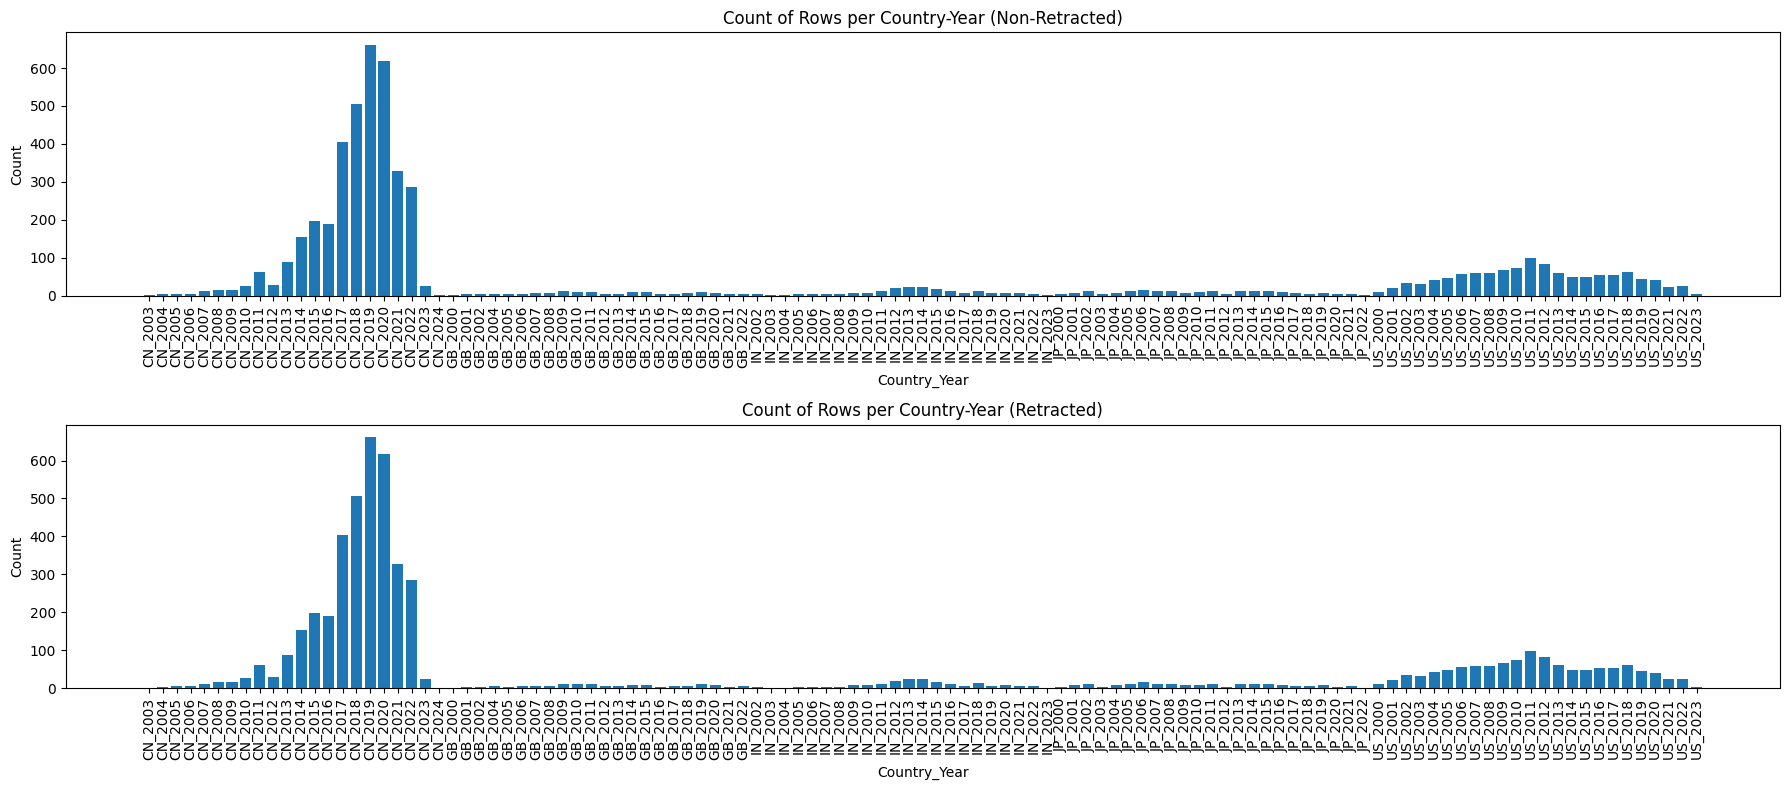

In [23]:

# Filter out papers before 2000

cleaned_nonretracted_df = cleaned_nonretracted_df[cleaned_nonretracted_df['year'] >= 2000]
cleaned_retracted_df = cleaned_retracted_df[cleaned_retracted_df['year'] >= 2000]

# Calculate counts per year per country for nonretracted dataframe

nonretracted_counts = cleaned_nonretracted_df.groupby(['country', 'year']).size().reset_index(name='count')

# Calculate counts per year per country for retracted dataframe

retracted_counts = cleaned_retracted_df.groupby(['country', 'year']).size().reset_index(name='count')

# Select top 5 countries with the highest counts

top_nonretracted_countries = nonretracted_counts.groupby('country').sum().nlargest(5, 'count').index
top_retracted_countries = retracted_counts.groupby('country').sum().nlargest(5, 'count').index

# Filter dataframes to include only top 5 countries

filtered_nonretracted_df = nonretracted_counts[nonretracted_counts['country'].isin(top_nonretracted_countries)]
filtered_retracted_df = retracted_counts[retracted_counts['country'].isin(top_retracted_countries)]

# Plotting cleaned_nonretracted_df

plt.figure(figsize=(18, 8))

# First subplot for cleaned_nonretracted_df
plt.subplot(2, 1, 1)
plt.bar(filtered_nonretracted_df['country'] + '_' + filtered_nonretracted_df['year'].astype(str), filtered_nonretracted_df['count'])
plt.title('Count of Rows per Country-Year (Non-Retracted)')
plt.xlabel('Country_Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Second subplot for cleaned_retracted_df

plt.subplot(2, 1, 2)
plt.bar(filtered_retracted_df['country'] + '_' + filtered_retracted_df['year'].astype(str), filtered_retracted_df['count'])
plt.title('Count of Rows per Country-Year (Retracted)')
plt.xlabel('Country_Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [24]:

# Filter out papers before 2000
cleaned_nonretracted_df = cleaned_nonretracted_df[cleaned_nonretracted_df['year'] >= 2000]
cleaned_retracted_df = cleaned_retracted_df[cleaned_retracted_df['year'] >= 2000]

# Calculate counts per year per country for nonretracted dataframe
nonretracted_counts = cleaned_nonretracted_df.groupby(['country', 'year']).size().reset_index(name='nonretracted_count')

# Calculate counts per year per country for retracted dataframe
retracted_counts = cleaned_retracted_df.groupby(['country', 'year']).size().reset_index(name='retracted_count')

# Merge the dataframes
merged_df = nonretracted_counts.merge(retracted_counts, on=['country', 'year'], how='outer').fillna(0)

# Calculate the difference
merged_df['difference'] = merged_df['nonretracted_count'] - merged_df['retracted_count']

# Count occurrences per year for retracted dataframe
retracted_counts_per_year = cleaned_retracted_df.groupby('year').size().reset_index(name='retracted_count')

# Merge with the country information
retracted_counts_per_year = retracted_counts_per_year.merge(cleaned_retracted_df[['year', 'country']], on='year', how='left')

# Calculate total retracted count per country and sort
sorted_countries = retracted_counts_per_year.groupby('country')['retracted_count'].sum().sort_values(ascending=False).index

# Create a dataframe for sorted countries
sorted_df = pd.DataFrame({'country': sorted_countries})

# Merge with original dataframe to retain country-year information
final_df = sorted_df.merge(merged_df, on='country', how='left')

# Display the dataframe
final_df.head(50)



,country,year,nonretracted_count,retracted_count,difference
0,CN,2003,1,1,0
1,CN,2004,4,4,0
2,CN,2005,5,5,0
3,CN,2006,5,5,0
4,CN,2007,12,12,0
5,CN,2008,15,15,0
6,CN,2009,16,16,0
7,CN,2010,26,26,0
8,CN,2011,62,62,0
9,CN,2012,29,29,0
